# Exploration of Venues in the State Capitals of the USA

### IBM Capstone Project 

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology and Analysis](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

In this final project, I will explore popular venues in 50 state capitals. 
I target travel agencies who aim to attract tourists to the US Capitals (assuming no effect of corona virus :)).
The aim is to find popular spots in the state capitals. I also aim to both distinguish them in their uniqueness and find similarities among them. 
This will help agencies to guide their customers better. They can offer destinations diverse enough to satisfy their customers,
so that customers would have a satisfying US experience.

I restricted the cities only to the capitals, because I thought that this would be a nice theme to attract tourists who want to 
do an unconventional US trip, rather than just visiting popular places only in well-known cities. 
Also, it is limited to downtown areas of the capitals. One of my aims is to capture ordinary life, 
so that I can explore the choices of locals in their respective cities.

In this project, I will cluster capitals according to the most common venues. 
And I will explore diverse capitals in detail to help travel agencies to recommend good places to their customers and come up with itineraries unique enough to satisfy customer needs. 


# Data <a name="data"></a>

I will get the data from two different places. 

The first one is a github page where I scrape latitudes and longitudes of capitals. 

The second one is Foursquare data. 
From there, I will use the explore function to get venues around capitals.
I will then get information regarding the venues.

Mainly; ratings, number of likes, number of tips, number of photos, price category (ranging between 1 and 4).
I will use these to have an estimate of popularity of venues.

The reason I chose to use this is because these are the information that I can get from Foursquare with a regular account.

I limit the number of venues for each state to 20. They are located 1500 meters radius from the center of capital. As you will see below not every city has that many venues. But I decided to keep the radius the same for every city in order to have a consistent comparison.

Below I show how I scraped the datasets and the last versions of them that are used in the analysis section.

In [1]:
import requests
import numpy as np
import pandas as pd

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install folium
print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:


CLIENT_ID = '' # my Foursquare ID
CLIENT_SECRET = '' # my Foursquare Secret
VERSION = '20180604'
print('My credentails:')
print('CLIENT_ID: ' + 'Hidden')
print('CLIENT_SECRET:' + 'Hidden')

My credentails:
CLIENT_ID: Hidden
CLIENT_SECRET:Hidden


In [3]:
#scrapes the page with BeautifulSoup
page = requests.get('https://gist.githubusercontent.com/kiwiholmberg/8433478/raw/e07ca8efd15293f9ab7e8279097c3696b51d5e21/gistfile1.html').text

from bs4 import BeautifulSoup
soup = BeautifulSoup(page, 'lxml')
#print(soup.prettify())

## Capitals

In [4]:
#gets the four columns of data
states = []
capital_names = []
capital_latitudes = []
capital_longitudes = []

for tr in soup.find_all('li'):
        tds = tr.find_all('p')
        if not tds:
            continue
        state,capital_name,capital_latitude,capital_longitude = ([td.text.strip() for td in tds[:4]])
        states.append(state.replace('Name: ',''))
        capital_names.append(capital_name.replace('Capital Name: ',''))
        capital_latitudes.append(float(capital_latitude.replace('Capital Latitude: ','')))
        capital_longitudes.append(float(capital_longitude.replace('Capital Longitude: ','')))

In [5]:
#writes the data to DataFrame
state_info = pd.DataFrame()
state_info['State'] = states
state_info['Capital'] = capital_names
state_info['Latitude'] = capital_latitudes
state_info['Longitude'] = capital_longitudes
state_info

,State,Capital,Latitude,Longitude
0,Alabama,Montgomery,32.361538,-86.279118
1,Alaska,Juneau,58.301935,-134.419740
2,Arizona,Phoenix,33.448457,-112.073844
3,Arkansas,Little Rock,34.736009,-92.331122
4,California,Sacramento,38.555605,-121.468926
5,Colorado,Denver,39.739167,-104.984167
6,Connecticut,Hartford,41.767000,-72.677000
7,Delaware,Dover,39.161921,-75.526755
8,Florida,Tallahassee,30.451800,-84.272770
9,Georgia,Atlanta,33.760000,-84.390000


In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            20)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Capital', 
                  'Capital Latitude', 
                  'Capital Longitude', 
                  'Venue', 
                  'Venue ID',          
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
capital_venues = getNearbyVenues(names=state_info['Capital'],
                                   latitudes=state_info['Latitude'],
                                   longitudes=state_info['Longitude']
                                  )

Montgomery
Juneau
Phoenix
Little Rock
Sacramento
Denver
Hartford
Dover
Tallahassee
Atlanta
Honolulu
Boise
Springfield
Indianapolis
Des Moines
Topeka
Frankfort
Baton Rouge
Augusta
Annapolis
Boston
Lansing
Saint Paul
Jackson
Jefferson City
Helana
Lincoln
Carson City
Concord
Trenton
Santa Fe
Albany
Raleigh
Bismarck
Columbus
Oklahoma City
Salem
Harrisburg
Providence
Columbia
Pierre
Nashville
Austin
Salt Lake City
Montpelier
Richmond
Olympia
Charleston
Madison
Cheyenne


In [8]:
print(capital_venues.shape)
capital_venues.head()

(959, 8)


,Capital,Capital Latitude,Capital Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Montgomery,32.361538,-86.279118,Shashy's Bakery & Fine Foods,4dcabad652b1c2222a89cc50,32.362289,-86.283226,Bakery
1,Montgomery,32.361538,-86.279118,Martin's Restaurant,4b9fc51af964a520ff3c37e3,32.357262,-86.282862,Fried Chicken Joint
2,Montgomery,32.361538,-86.279118,Chick-fil-A,4b50c761f964a520133227e3,32.368860,-86.270454,Fast Food Restaurant
3,Montgomery,32.361538,-86.279118,Zaxby's Chicken Fingers & Buffalo Wings,4bb234ec35f0c9b6b3f4ba83,32.364406,-86.268742,Fried Chicken Joint
4,Montgomery,32.361538,-86.279118,Subway,4ba2d789f964a520721d38e3,32.357502,-86.283664,Sandwich Place


As you can see from below, even if I tried multiple times, Foursquare did not give any results for Bismarck. 
Therefore, I decided to exclude that capital.

In [14]:
capital_venues.groupby('Capital').Capital.nunique().sum()

49

In [15]:
capital_venues.groupby('Capital').count()


,Capital Latitude,Capital Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
Capital,,,,,,,
Albany,20,20,20,20,20,20,20
Annapolis,20,20,20,20,20,20,20
Atlanta,20,20,20,20,20,20,20
Augusta,20,20,20,20,20,20,20
Austin,20,20,20,20,20,20,20
Baton Rouge,20,20,20,20,20,20,20
Boise,20,20,20,20,20,20,20
Boston,20,20,20,20,20,20,20
Carson City,20,20,20,20,20,20,20


## An example of venues in Carson City

In [10]:
carson = capital_venues[capital_venues['Capital'] == 'Carson City']
carson.head()

,Capital,Capital Latitude,Capital Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
526,Carson City,39.160949,-119.753877,Paul Schat's Bakery,4b92881cf964a520970134e3,39.156239,-119.765484,Bakery
527,Carson City,39.160949,-119.753877,Carson City Aquatic Facility,4bfaf977bbb7c92873830743,39.169057,-119.759542,Gym Pool
528,Carson City,39.160949,-119.753877,Dutch Bros. Coffee,4c6d42d96af58cfacae58817,39.156386,-119.766733,Coffee Shop
529,Carson City,39.160949,-119.753877,Sportsman's Warehouse,5339acbd498e75abcda555c8,39.154992,-119.765967,Outdoor Supply Store
530,Carson City,39.160949,-119.753877,Comma Coffee,4b844baff964a5200a2d31e3,39.162055,-119.767024,Coffee Shop


In [11]:
venues_map = folium.Map(location=[39.160949, -119.753877], zoom_start=14.4) # generate map centred around Carson City


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(carson['Venue Latitude'], carson['Venue Longitude'] ,carson['Venue Category']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

Click below to see the map


https://github.com/zeynep-akca/Coursera_Capstone/blob/master/Carson%20City.png

## Getting details of venues

With a regular account, I was able to get details from 500 venues per day, 
so I limited the number of venues to twenty for each capital. Some capitals have lower than 20 venues returned. 

In [13]:
def get_details(venues_id):     
    venue_details = []    
    for venue_id in venues_id:
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        print(venue_id)
        details = [venue_id]    
        try:
            details.append(result['response']['venue']['name'])
        except Exception as e:
            details.append('N/A')       
        try:
            details.append(result['response']['venue']['categories'][0]['name'])
        except Exception as e:
            details.append('N/A')
        try:
            details.append(result['response']['venue']['rating'])
        except Exception as e:
            details.append('N/A')
        try:
            details.append(result['response']['venue']['likes']['count'])
        except Exception as e:
            details.append('N/A')
        try:
            details.append(result['response']['venue']['tips']['count'])
        except Exception as e:
            details.append('N/A')
        try:
            details.append(result['response']['venue']['photos']['count'])
        except Exception as e:
            details.append('N/A')  
        try:
            details.append(result['response']['venue']['price']['tier'])
        except Exception as e:
            details.append('N/A')
        try:
            details.append(result['response']['venue']['location']['lat'])
        except Exception as e:
            details.append('N/A')
        try:
            details.append(result['response']['venue']['location']['lng'])
        except Exception as e:
            details.append('N/A')     
        venue_details.append(details)    
    venues = pd.DataFrame([item for item in venue_details])
    venues.columns = ['Venue ID',
                  'Venue Name',
                  'Categories',
                  'Rating', 
                  '# of Likes', 
                  '# of Tips',          
                  '# of Photos',
                  'Price Category',
                     'Latitude',
                     'Longitude']
    return(venues)

Because of the limitation of a regular account, I pulled data from Foursquare in different times, 
and saved those to csv files, from this point onward, I will use these informations that I stored in csvs.

In [ ]:
for capital in state_info['Capital'][:33]:
    venues_capital = capital_venues[capital_venues['Capital'] == capital]
    venues_details = get_details(venues_capital['Venue ID'])
    venues_details.to_csv('{}.csv'.format(capital), header=True, index=False) 
    print(capital)

In [ ]:
for capital in state_info['Capital'][34:]:
    venues_capital = capital_venues[capital_venues['Capital'] == capital]
    venues_details = get_details(venues_capital['Venue ID'])
    venues_details.to_csv('{}.csv'.format(capital), header=True, index=False) 
    print(capital)

Here I combined all the data I had, now the data ready for analysis.

In [22]:
state_capital = state_info[state_info.Capital != 'Bismarck']

In [38]:
appended_data = []
for capital in state_capital['Capital']:
    details = pd.read_csv('{}.csv'.format(capital))
    name = [capital]*len(details.index)
    details.insert(loc=0, column='Capital', value=name)  
    appended_data.append(details)
appended_data = pd.concat(appended_data)

In [40]:
appended_data.shape

(956, 11)

In [42]:
appended_data.head(100)

,Capital,Venue ID,Venue Name,Categories,Rating,# of Likes,# of Tips,# of Photos,Price Category,Latitude,Longitude
0,Montgomery,4dcabad652b1c2222a89cc50,Shashy's Bakery & Fine Foods,Bakery,8.4,21,9,7,1.0,32.362289,-86.283226
1,Montgomery,4b9fc51af964a520ff3c37e3,Martin's Restaurant,Fried Chicken Joint,7.9,19,11,26,1.0,32.357262,-86.282862
2,Montgomery,4b50c761f964a520133227e3,Chick-fil-A,Fast Food Restaurant,9.0,57,21,21,1.0,32.368860,-86.270454
3,Montgomery,4bb234ec35f0c9b6b3f4ba83,Zaxby's Chicken Fingers & Buffalo Wings,Fried Chicken Joint,8.2,24,6,15,2.0,32.364406,-86.268742
4,Montgomery,4ba2d789f964a520721d38e3,Subway,Sandwich Place,7.5,4,1,1,1.0,32.357502,-86.283664
5,Montgomery,4bad3674f964a520d3393be3,La Zona Rosa,Mexican Restaurant,8.5,52,29,57,2.0,32.359185,-86.265233
6,Montgomery,4da855c293a021ab13c6d644,Midtown Pizza Kitchen,Pizza Place,8.7,45,29,118,2.0,32.357174,-86.265484
7,Montgomery,576b2c85cd10f350e1b9006b,First Watch - Montgomery,Breakfast Spot,8.7,18,5,10,1.0,32.357405,-86.265341
8,Montgomery,4dac89988154abafc2d9e305,Sushi Cafe,Sushi Restaurant,9.0,62,29,43,2.0,32.356001,-86.265085
9,Montgomery,51630d20e4b00e962fec3fc1,Firehouse Subs,Sandwich Place,8.4,13,2,4,1.0,32.358278,-86.265244


In [43]:
appended_data.isnull().sum()

Capital             0
Venue ID            0
Venue Name          0
Categories          0
Rating             20
# of Likes          0
# of Tips           0
# of Photos         0
Price Category    349
Latitude            0
Longitude           0
dtype: int64

Here we ended up with 49 state capitals where most of them have 20 venues. 
Each venue has details regarding ratings, number of likes, number of tips, number of photos, and price category (1-4).
There are 20 ratings and 349 price categories missing in our data set. 

# Methodology <a name="methodology"></a>

In this project, I will limit the analysis to this dataset above (appended_data). 

In the initial step, I will try to cluster capitals, this will help to see which capitals are similar 
and which capitals are different. I will first create a list of most common venue categories in each capital and then cluster them. I will use k means and elbow methods to do clustering. 

As a second step, I will do in depth exploration of capitals by various factors such as ratings, number of likes etc. I will compare them and try to see if there is a significant difference between the coasts and capitals in general.

# Analysis

##### Clustering (Step 1)

In [95]:
print('There are {} unique venue categories.'.format(len(appended_data['Categories'].unique())))

There are 191 unique venue categories.


First, let's get the most common venue categories in each capital.

In [96]:
capitals_onehot = pd.get_dummies(appended_data[['Categories']], prefix="", prefix_sep="")
capitals_onehot['Capital'] = appended_data['Capital'] 
fixed_columns = [capitals_onehot.columns[-1]] + list(capitals_onehot.columns[:-1])
capitals_onehot = capitals_onehot[fixed_columns]
capitals_onehot.head()

,Capital,Advertising Agency,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Thrift / Vintage Store,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Montgomery,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Montgomery,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Montgomery,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Montgomery,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Montgomery,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
capitals_onehot.shape

(956, 192)

In [98]:
capitals_grouped = capitals_onehot.groupby('Capital').mean().reset_index()
capitals_grouped

,Capital,Advertising Agency,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Thrift / Vintage Store,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Albany,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.05,0.00,...,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.05,0.000000
1,Annapolis,0.00,0.00,0.050000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
2,Atlanta,0.00,0.00,0.050000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
3,Augusta,0.00,0.00,0.100000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
4,Austin,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.000000
5,Baton Rouge,0.00,0.00,0.058824,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
6,Boise,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
7,Boston,0.00,0.00,0.050000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
8,Carson City,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
9,Charleston,0.00,0.00,0.050000,0.00,0.00,0.05,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000


In [99]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [100]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Capital']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

capitals_venues_sorted = pd.DataFrame(columns=columns)
capitals_venues_sorted['Capital'] = capitals_grouped['Capital']

for ind in np.arange(capitals_grouped.shape[0]):
    capitals_venues_sorted.iloc[ind, 1:] = return_most_common_venues(capitals_grouped.iloc[ind, :], num_top_venues)

capitals_venues_sorted.head()

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albany,Latin American Restaurant,Burger Joint,Sandwich Place,Bar,Sushi Restaurant
1,Annapolis,Bar,Thai Restaurant,Spa,French Restaurant,Gastropub
2,Atlanta,Hotel Bar,Music Venue,Cajun / Creole Restaurant,History Museum,Poke Place
3,Augusta,Pharmacy,American Restaurant,Convenience Store,History Museum,Thai Restaurant
4,Austin,Coffee Shop,Mexican Restaurant,Garden,Dance Studio,Restaurant


Let's now, do clustering based on common venues.

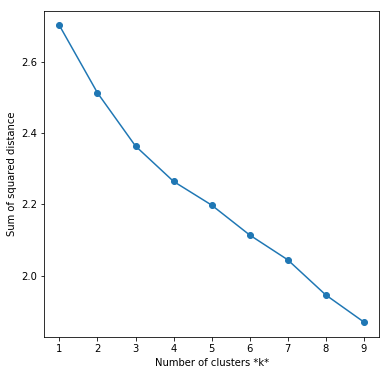

In [101]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
capitals_grouped_clustering = capitals_grouped.drop('Capital', 1)

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0).fit(capitals_grouped_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

The elbow method did not give a clear cutoff point. After I tried different k's, 
I decided to proceed with k=4, the reason is it is the number of cluster 
that shows the clear distinction between the coasts. 
I thought that I can reach meaningful conclusions from here to present travel agencies.

In [102]:
kclusters = 4
capitals_grouped_clustering = capitals_grouped.drop('Capital', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(capitals_grouped_clustering)
kmeans.labels_[0:10]

array([1, 1, 1, 3, 0, 3, 1, 1, 0, 1], dtype=int32)

In [103]:
state_capital.head()

,State,Capital,Latitude,Longitude
0,Alabama,Montgomery,32.361538,-86.279118
1,Alaska,Juneau,58.301935,-134.419740
2,Arizona,Phoenix,33.448457,-112.073844
3,Arkansas,Little Rock,34.736009,-92.331122
4,California,Sacramento,38.555605,-121.468926


In [104]:
capitals_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
capitals_merged = state_capital
capitals_merged = capitals_merged.join(capitals_venues_sorted.set_index('Capital'), on='Capital')
capitals_merged.head()

,State,Capital,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Alabama,Montgomery,32.361538,-86.279118,3,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Breakfast Spot
1,Alaska,Juneau,58.301935,-134.419740,1,Bar,Coffee Shop,Food Truck,Taco Place,Russian Restaurant
2,Arizona,Phoenix,33.448457,-112.073844,1,Salon / Barbershop,Pub,Theater,Opera House,Breakfast Spot
3,Arkansas,Little Rock,34.736009,-92.331122,3,Hotel,Mexican Restaurant,Pharmacy,Zoo,Bank
4,California,Sacramento,38.555605,-121.468926,0,Coffee Shop,Vietnamese Restaurant,Pet Store,Café,Marijuana Dispensary


In [109]:
latitude = 40
longitude = - 98

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(capitals_merged['Latitude'], capitals_merged['Longitude'], capitals_merged['Capital'], capitals_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Click here to see the map

https://github.com/zeynep-akca/Coursera_Capstone/blob/master/USA.png

#### Cluster 1 (Named as Cluster 0 on the map, Red)

In [107]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 0, capitals_merged.columns[[1] + list(range(5, capitals_merged.shape[1]))]]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Sacramento,Coffee Shop,Vietnamese Restaurant,Pet Store,Café,Marijuana Dispensary
10,Honolulu,Japanese Restaurant,Coffee Shop,Scenic Lookout,Mexican Restaurant,State / Provincial Park
15,Topeka,Mexican Restaurant,Coffee Shop,Indian Restaurant,Gym,Breakfast Spot
24,Jefferson City,Pizza Place,Coffee Shop,Mexican Restaurant,Pub,Sandwich Place
26,Lincoln,Mexican Restaurant,Park,Coffee Shop,Zoo,Garden
27,Carson City,Coffee Shop,Thai Restaurant,History Museum,Park,Mexican Restaurant
36,Salem,Coffee Shop,American Restaurant,Theater,State / Provincial Park,Farmers Market
42,Austin,Coffee Shop,Mexican Restaurant,Garden,Dance Studio,Restaurant
43,Salt Lake City,Coffee Shop,Food Stand,Hotel,Food Truck,Burger Joint
46,Olympia,Coffee Shop,Sandwich Place,Park,Brewery,Diner


#### Cluster 2  (Named as Cluster 1 on the map, Purple)

In [108]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 1, capitals_merged.columns[[1] + list(range(5, capitals_merged.shape[1]))]]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Juneau,Bar,Coffee Shop,Food Truck,Taco Place,Russian Restaurant
2,Phoenix,Salon / Barbershop,Pub,Theater,Opera House,Breakfast Spot
5,Denver,Yoga Studio,Breakfast Spot,History Museum,Jewelry Store,Park
7,Dover,Pizza Place,BBQ Joint,Flea Market,Monument / Landmark,Seafood Restaurant
8,Tallahassee,Cosmetics Shop,New American Restaurant,Japanese Restaurant,Beer Bar,Cocktail Bar
9,Atlanta,Hotel Bar,Music Venue,Cajun / Creole Restaurant,History Museum,Poke Place
11,Boise,Pub,Chinese Restaurant,Seafood Restaurant,Park,Dive Bar
13,Indianapolis,Brewery,Yoga Studio,Gay Bar,New American Restaurant,Advertising Agency
14,Des Moines,Hotel,Music Venue,Tapas Restaurant,Café,Skating Rink
16,Frankfort,Pizza Place,History Museum,Café,Food Court,Bookstore


#### Cluster 3 (Named as Cluster 2 on the map, Blue)

In [110]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 2, capitals_merged.columns[[1] + list(range(5, capitals_merged.shape[1]))]]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
23,Jackson,Zoo,Sandwich Place,Moving Target,Fast Food Restaurant,BBQ Joint


#### Cluster 4 (Named as Cluster 3 on the map, Yellow)

In [198]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 3, capitals_merged.columns[[1] + list(range(5, capitals_merged.shape[1]))]]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Montgomery,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Breakfast Spot
3,Little Rock,Hotel,Mexican Restaurant,Pharmacy,Zoo,Bank
6,Hartford,Theater,American Restaurant,Boutique,Mexican Restaurant,Sandwich Place
12,Springfield,Pharmacy,Restaurant,Diner,Italian Restaurant,Donut Shop
17,Baton Rouge,Gas Station,Discount Store,Convenience Store,Grocery Store,Fast Food Restaurant
18,Augusta,Pharmacy,American Restaurant,Convenience Store,History Museum,Thai Restaurant
28,Concord,Science Museum,Sandwich Place,Pizza Place,Sporting Goods Shop,Storage Facility
39,Columbia,American Restaurant,Seafood Restaurant,Pizza Place,Bakery,Burger Joint
40,Pierre,Mobile Phone Shop,Pizza Place,Liquor Store,Restaurant,Movie Theater
41,Nashville,Hotel,Music Venue,Sandwich Place,Park,Steakhouse


Even if we did not get a clear cutoff point from elbow methow, 
clustering by 4 shows that there is a clear distinction between the coasts.
Before diving into that, we should be aware of the fact that there is only one capital in the third cluster. 
The reason might be that there are only 6 venues returned for Jackson and all of them belong to different venue categories, 
therefore the order does not reflect the most common venues in the city. And the k-means could not put it into any other cluster.
The fourth cluster looks different than the first two 
but it does not have a distinct feature as the other two have.

From the map it is clear that there is a difference between the West and East Coasts of the country. 
The West Coast capitals have concentrated more on coffee shops and 
the East Coast capitals more pizza places and bars. 

### Comparison of the Two Coasts (Step 2)

In order to see if there is a significant difference between 
how people engage in places on the coasts, I will compare them by various factors.

I will compare coffee shops, pizza places and bars on two coasts. Since this analysis is based on coasts, I decided to exclude certain capitals. The capital which is included to the Cluster 1 but location-wise counted as the east (based on the middle meridian); Jefferson, and the capitals which are included to the Cluster 2 but location-wise counted as the west; Boise, Helane, Cheyenne, Phoenix, Santa Fe, Oklahoma City, and Denver are excluded from the analysis. 

In [170]:
west_venues = appended_data[appended_data.Capital.isin(['Olympia', 'Salem', 'Sacramento', 
                                                        'Carson City', 'Honolulu',
                                                       'Topeka','Lincoln', 'Austin'])]

In [119]:
east_venues = appended_data[appended_data.Capital.isin(['Juneau', 'Dover', 'Tallahassee','Atlanta',
                                                     'Indianapolis', 'Des Moines', 'Frankfort',
                                                    'Annapolis', 'Boston', 'Lansing',
                                                     'Saint Paul', 'Trenton',  'Albany', 'Raleigh',
                                                     'Columbus', 'Harrisburg','Providence', 'Montpelier',
                                                     'Richmond', 'Charleston', 'Madison'])]

#### Coffee Shops

Firstly, I got descriptive stats for coffee shops in each coast. 
There are 24 coffee shops in the west, and 15 in the east. 
At the first glance, means and stds for each factor are pretty similar to each other except the number of photos. 

In [164]:
west_coffee = west_venues[west_venues['Categories'] == 'Coffee Shop']
east_coffee = east_venues[east_venues['Categories'] == 'Coffee Shop']

In [125]:
west_coffee.describe()

,Rating,# of Likes,# of Tips,# of Photos,Price Category,Latitude,Longitude
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8.225000,51.958333,20.125000,89.416667,1.333333,39.500645,-118.588800
std,0.550296,50.341857,21.297709,99.488656,0.481543,7.268677,16.364630
min,7.200000,1.000000,0.000000,0.000000,1.000000,21.298552,-157.838272
25%,7.775000,20.750000,4.750000,15.750000,1.000000,38.561583,-123.021490
50%,8.150000,39.500000,14.500000,49.500000,1.000000,39.171711,-121.471916
75%,8.725000,62.500000,25.750000,113.750000,2.000000,44.937042,-114.247557
max,9.000000,208.000000,88.000000,373.000000,2.000000,47.045435,-95.695906


In [126]:
east_coffee.describe()

,Rating,# of Likes,# of Tips,# of Photos,Price Category,Latitude,Longitude
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.180000,51.533333,20.200000,57.066667,1.200000,42.096926,-88.412531
std,0.544059,61.901842,20.918891,68.371325,0.414039,7.402665,19.571899
min,6.900000,5.000000,0.000000,4.000000,1.000000,30.454443,-134.421394
25%,7.900000,11.000000,5.500000,17.500000,1.000000,39.068161,-87.760729
50%,8.100000,37.000000,13.000000,32.000000,1.000000,39.963640,-83.000568
75%,8.550000,63.500000,35.500000,78.000000,1.000000,42.904774,-76.978404
max,9.000000,246.000000,60.000000,271.000000,2.000000,58.301657,-71.031759


T-test did not give a significant result for the number of likes (p-value=0.75). 
This means that there is no significant difference between the coasts in terms of how many times people liked the coffee shops.

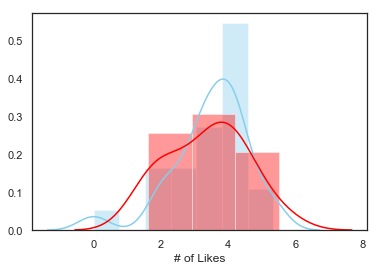

In [150]:
import seaborn as sns
west_log_like = np.log(west_coffee["# of Likes"])
east_log_like = np.log(east_coffee["# of Likes"])
sns.distplot( west_log_like , color="skyblue", label="West")
sns.distplot( east_log_like , color="red", label="East")

In [137]:
from scipy import stats
stats.ttest_ind(west_log_like, east_log_like, equal_var = False)

Ttest_indResult(statistic=0.31762624546292667, pvalue=0.7530073269210897)

T-test did not give a significant result for ratings (p-value=0.80). 
This means that there is no significant difference between the coasts in terms of how much people rated the coffee shops.

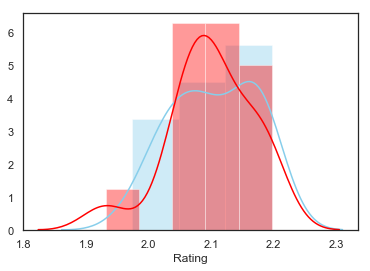

In [155]:
west_log_rating = np.log(west_coffee["Rating"])
east_log_rating = np.log(east_coffee["Rating"])
sns.distplot( west_log_rating  , color="skyblue", label="West")
sns.distplot( east_log_rating  , color="red", label="East")

In [156]:
stats.ttest_ind(west_log_rating, east_log_rating, equal_var = False)

Ttest_indResult(statistic=0.24419288263800398, pvalue=0.8087611459614745)

T-test did not give a significant result for the number of tips (p-value=0.99). 
This means that there is no significant difference between the coasts 
in terms of how much they engaged with the coffee shops and left tips for other people.

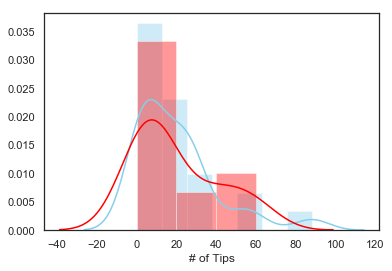

In [158]:
sns.distplot( west_coffee["# of Tips"] , color="skyblue", label="West")
sns.distplot( east_coffee["# of Tips"]  , color="red", label="East")

In [159]:
stats.ttest_ind(west_coffee["# of Tips"], east_coffee["# of Tips"], equal_var = False)

Ttest_indResult(statistic=-0.01081709333852626, pvalue=0.9914403331588058)

Lastly, the number of photos uploaded is not significantly different either. 
Here I used Mann-Whitney U Test (the non parametric version of student-t test), 
because log transformation was inapplicable. And I got p-value=0.24.

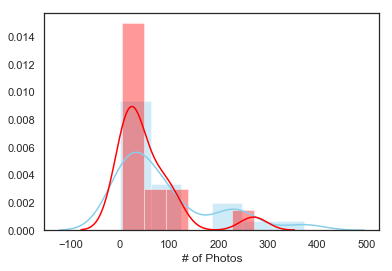

In [154]:
sns.distplot( west_coffee["# of Photos"] , color="skyblue", label="West")
sns.distplot( east_coffee["# of Photos"]  , color="red", label="East")

In [195]:
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(west_coffee["# of Photos"], east_coffee["# of Photos"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=152.000, p=0.214


#### Bars

Since there is no bar returned from our sample in the west coast, there is no further analysis done for bars.

In [171]:
west_bar = west_venues[west_venues['Categories'] == 'Bar']
east_bar = east_venues[east_venues['Categories'] == 'Bar']

In [174]:
east_bar.describe()

,Rating,# of Likes,# of Tips,# of Photos,Price Category,Latitude,Longitude
count,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000
mean,8.288889,61.111111,21.888889,173.277778,2.0,42.711570,-88.440184
std,0.447067,65.857144,23.891640,189.313560,0.0,7.919534,21.766102
min,7.400000,6.000000,2.000000,4.000000,2.0,30.455368,-134.405969
25%,8.000000,17.750000,7.750000,47.000000,2.0,38.978062,-84.507363
50%,8.350000,43.500000,12.000000,77.500000,2.0,40.214370,-79.253210
75%,8.600000,68.500000,22.750000,305.000000,2.0,43.878957,-75.767478
max,8.900000,252.000000,82.000000,661.000000,2.0,58.300597,-72.576439


In [175]:
west_bar.shape

(0, 11)

#### Pizza Places 

There are 3 pizza places in our sample for the West Coast, compared to 17 returned for the East Coast. 
The sample is not enough to do a comparison.

In [176]:
west_pizza = west_venues[west_venues['Categories'] == 'Pizza Place']
east_pizza = east_venues[east_venues['Categories'] == 'Pizza Place']

In [179]:
west_pizza.describe()

,Rating,# of Likes,# of Tips,# of Photos,Price Category,Latitude,Longitude
count,3.000000,3.00000,3.000000,3.000000,3.0,3.000000,3.000000
mean,7.500000,42.00000,19.333333,74.000000,1.0,35.797133,-125.477710
std,0.916515,37.98684,17.785762,78.562077,0.0,13.172875,31.151861
min,6.500000,1.00000,0.000000,6.000000,1.0,21.305567,-157.838715
25%,7.100000,25.00000,11.500000,31.000000,1.0,30.172959,-140.368925
50%,7.700000,49.00000,23.000000,56.000000,1.0,39.040350,-122.899134
75%,8.000000,62.50000,29.000000,108.000000,1.0,43.042916,-109.297207
max,8.300000,76.00000,35.000000,160.000000,1.0,47.045481,-95.695280


In [180]:
east_pizza.describe()

,Rating,# of Likes,# of Tips,# of Photos,Price Category,Latitude,Longitude
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,8.094118,73.294118,32.705882,97.823529,1.294118,41.819124,-85.826978
std,0.874264,108.355759,51.775676,148.553541,0.469668,4.963616,14.498081
min,6.200000,0.000000,1.000000,1.000000,1.000000,37.546265,-134.408206
25%,7.500000,11.000000,5.000000,8.000000,1.000000,38.350354,-89.386999
50%,8.500000,21.000000,10.000000,13.000000,1.000000,40.263257,-84.848245
75%,8.800000,66.000000,31.000000,147.000000,2.000000,43.074913,-76.887012
max,9.000000,388.000000,198.000000,532.000000,2.000000,58.299434,-71.022322


In [182]:
west_pizza

,Capital,Venue ID,Venue Name,Categories,Rating,# of Likes,# of Tips,# of Photos,Price Category,Latitude,Longitude
19,Honolulu,54e3ce44498ea1093dee4310,Pizza Hut,Pizza Place,6.5,1,0,6,1.0,21.305567,-157.838715
4,Topeka,508eb285e4b07bfac74f7435,College Hill Pizza Pub,Pizza Place,7.7,49,23,56,1.0,39.040350,-95.695280
8,Olympia,4b6c8faff964a5203d432ce3,Old School Pizzeria,Pizza Place,8.3,76,35,160,1.0,47.045481,-122.899134


### Comparing the Coasts

I decided to do a comparison between coasts in terms of the number of likes in general, 
rather than doing a venue category-wise comparison. 
This would be helpful to see if there is a popularity difference between capitals in each coast. 

Let's sort the lists by the number of likes and see the places where people liked the most in each coast.

In [183]:
west_venues.sort_values(by='# of Likes', ascending=False)

,Capital,Venue ID,Venue Name,Categories,Rating,# of Likes,# of Tips,# of Photos,Price Category,Latitude,Longitude
6,Austin,4c77cbe5947ca1cd90694837,Austin City Limits Live,Performing Arts Venue,9.4,1092,98,3212,NaN,30.265288,-97.747260
15,Austin,49e32bbaf964a52068621fe3,La Condesa,Mexican Restaurant,8.6,586,269,808,3.0,30.265466,-97.747734
3,Austin,4db8a87c6a2334682d9809a9,Violet Crown Cinema,Indie Movie Theater,8.9,330,75,331,NaN,30.265524,-97.748189
2,Sacramento,4b0586b4f964a520816a22e3,Gunther's Quality Ice Cream,Ice Cream Shop,9.2,251,79,288,1.0,38.553600,-121.475792
4,Austin,554377bc498e6cb88b23f4bf,Trader Joe's,Grocery Store,9.2,208,8,195,NaN,30.267585,-97.752687
7,Sacramento,4b1c1d5ff964a520680224e3,Temple Coffee & Tea,Coffee Shop,9.0,208,88,373,2.0,38.563899,-121.472408
2,Austin,4a61f288f964a520b1c21fe3,Juan Pelota Café,Coffee Shop,8.9,177,58,255,1.0,30.267953,-97.749365
8,Sacramento,4b0586b9f964a520386b22e3,Sacramento Natural Foods Co-op,Grocery Store,9.1,163,32,156,NaN,38.564475,-121.472676
17,Austin,52b22a64498ec5b9cc4cbbef,Wu Chow,Chinese Restaurant,8.7,150,36,137,1.0,30.268493,-97.747960
12,Austin,548f88e4498ef56ade159270,Fixe Austin,Restaurant,8.8,145,39,89,3.0,30.268781,-97.748578


In [184]:
east_venues.sort_values(by='# of Likes', ascending=False)

,Capital,Venue ID,Venue Name,Categories,Rating,# of Likes,# of Tips,# of Photos,Price Category,Latitude,Longitude
3,Atlanta,4a05d34ef964a52083721fe3,Centennial Olympic Park,Park,9.2,1012,209,3505,NaN,33.760356,-84.393507
13,Des Moines,4df4d43522718759f8245edd,Zombie Burger + Drink Lab,Burger Joint,8.7,749,317,1310,2.0,41.590380,-93.613471
12,Atlanta,4aa08dedf964a520094020e3,Atlanta Marriott Marquis,Hotel,8.6,695,128,2267,NaN,33.761600,-84.385929
0,Atlanta,40e0b100f964a5209b071fe3,The Tabernacle,Music Venue,9.1,678,93,1746,NaN,33.758719,-84.391455
3,Madison,4afcc582f964a520bc2522e3,The Old Fashioned Tavern & Restaurant,Gastropub,9.0,614,259,906,2.0,43.076153,-89.383526
10,Boston,4a5c1457f964a5202fbc1fe3,South Shore Plaza,Shopping Mall,8.0,493,82,256,NaN,42.221995,-71.023768
13,Raleigh,4e091acc1f6e21103396e069,Beasley's Chicken + Honey,Southern / Soul Food Restaurant,9.2,453,173,590,2.0,35.776968,-78.638175
8,Des Moines,4b43e42ef964a52058ed25e3,Fong's Pizza,Pizza Place,9.0,388,198,532,2.0,41.585925,-93.621893
1,Des Moines,4b47c204f964a5206f3d26e3,Wells Fargo Arena,Basketball Stadium,8.5,376,36,807,NaN,41.592577,-93.621165
19,Columbus,4b37b158f964a520754425e3,Center of Science and Industry (COSI),Science Museum,9.0,367,65,468,NaN,39.959816,-83.006995


There is indeed a significant difference between the coasts (p-value = 0.004) in terms of the number of likes. 
We can also observe that the East Coast capitals are richer in terms of venue categories, 
such as parks, stadiums, museums, arenas, markets etc. However, when we check the sorted list for the West, 
we can see that capital centers do not provide that many variety to people. 

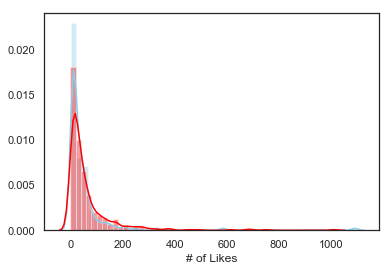

In [197]:
sns.distplot( west_venues["# of Likes"] , color="skyblue", label="West")
sns.distplot( east_venues["# of Likes"] , color="red", label="East")

In [193]:
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(west_venues["# of Likes"], east_venues["# of Likes"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=28739.000, p=0.004


# Results <a name="results"></a>

The analysis showed that there is a clear distinction between the West and East Coast capitals. 
Coffee Shops are more common in the West Coast whereas bars and pizza places are common in the East. 
The comparison of coffee shops in the two coasts in terms of the number of likes, ratings, 
the number of tips, the number of photos did not give significant results. 
Therefore we can conclude that how people engage with these coffee shops is not significantly different in the two coasts.
This also means that coffee shops in the West are not unique in itself to attract people's special attention and effort to rate, like or upload photos that are substantially different than people do in the East Coast coffee shops.
The same comparison was not possible for bars and pizza places because there are not enough 
samples from the West Coast to reach meaningful conclusions. But this in general is a sign that bars and pizza places are not common in the West.
Therefore travel agencies can set their customers' expectations accordingly. 
Tourists may have a hard time to find bars and pizza places in the West.


Secondly, we see that capital centers in the East Coast are richer in content. 
There are more variety of venues on this coast. People engage with these venues more actively compared to the West. 
The states are smaller in the East, so there are more capitals and they can be more reachable in a limited time period.
So travel agencies may consider recommending their customers to allocate more time in the East Coast. 

# Discussion <a name="discussion"></a>

There are limits to this project where it can be overcomed if it is turned to be a more extensive project.
The biggest obstacle was not being able to pull data from Foursquare because of certain restrictions. 
This could be overcomed by doing extra payment and switching to a private account. 
I was able to pull 20 venues for each capital, increasing this to 50 or 100 would provide a dataset to do more confident analysis and to reach better conclusions.

Also, I limited the center to 1500 m radius. This might be increased or decreased for some capitals. 
There could be more extensive research on how each capital defines its limits of the downtown area. Besides that, I was able to work with 49 capitals and had to omit Bismarck because no venues returned from the Foursquare pull for this capital.

Another thing is I only got records of the venues which are registered in Foursquare, 
there might be places which are missed because they are not in the database. Furthermore, 
I formed my analysis based on factors that are shared in the website. 
There might be a huge number of people who did not share their opinions for the venues that they visited. 
So the information I had about the venues is limited to the people who are active users.

In this project, I used ratings, number of likes, number of tips, number of photos as indicators of a place's popularity.
There are factors that I wanted to include but could not do that 
because it is not possible to get it if you are not the owner of the place. 
Such as the total count of check-in of a place so far and the number of different people who visited a place. 
These two factors could have been useful to know in terms of figuring out the crowdedness of a place and 
how many new people a place could attract.


# Conclusion <a name="conclusion"></a>

My aim in this project is to see the differences and similarities in the capitals in terms of venue categories 
and have meaningful insights for the travel agencies to attract their customers with appealing recommendations.
I believe this project is helpful to travel agencies for creating an itinenary on each coast.
The results showed that it is better if they have unique travel recommendations for each coast. 
They can look more into the substitutes of bars and pizza places in the West Coast closely. 
Also they can investigate more closely the places in the East, and calculate 
how much time is needed to have an extensive trip compared to the West. 